In [5]:
!pip install opencv-python
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     ---------- -------------------------- 30.7/106.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 106.6/106.6 kB 1.6 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB 10.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.8/8.1 MB 9.6 MB/s eta 0:00:01
   ----- ---------------------------------- 1.2/8.1 MB 9.6 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.1 MB 9.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 9.4 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/8.1 MB 9.3 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 9.3 MB/s eta 0:00:01
   ---------------- -----


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

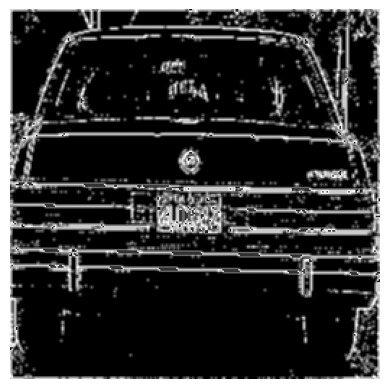

In [7]:
def convolve_image(image, kernel):
    # Convert the input image to grayscale if it is not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Get image dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the input image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Create an output image
    output_image = np.zeros_like(image)
    
    # Perform convolution operation without using scipy.signal.convolve2d
    for i in range(image_height):
        for j in range(image_width):
            output_image[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)
    
    return output_image

# Load an example image
input_image = cv2.imread("../Dataset/DatasetA/car-1.jpg")

kernelC = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])
kernelB = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])/50
kernelA = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])/10


# Perform convolution using the custom function
output_image = convolve_image(input_image, kernelB)
output_image = convolve_image(output_image, kernelA)


# Display the output grayscale image
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()
